In [ ]:
### Visual experiments

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (same as Django app)
df = pd.read_csv("/Users/patrickstewart/Documents/Customer review platform/data/product_processed.csv")

# Quick summary
print(df['review_text'].iloc[1])


: 

In [ ]:
# Split out the aspect terms
# Design ideas - can we highlight the bits of the review we care about, and then show the general higher level ideas as aspect terms and sentiment
df_exploded = df.assign(
    aspect_terms=df["aspect_terms"].str.split(", "),
    sentiments=df["sentiments"].str.split(", ")
).explode(["aspect_terms", "sentiments"])

In [15]:
df_exploded.head(10)

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,...,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd,aspect_terms,sentiments
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix Citrus Clean Balm...,...,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,Clean Balm,Positive
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix Citrus Clean Balm...,...,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,Melt,Positive
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix Citrus Clean Balm...,...,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,makeup melt,Positive
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,...,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,lip,Negative
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,...,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,jelly,Positive
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,...,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,lip mask,Positive
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,Ive always loved this formula for a long time....,...,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,formula,Positive
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,Ive always loved this formula for a long time....,...,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Grapefruit,Positive
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",...,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,price,Positive
5,5,42802569154,4,1.0,1.0,1,0,1,2023-03-19,The scent isnt my favourite but it works great...,...,lightMedium,brown,normal,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,scent,Positive


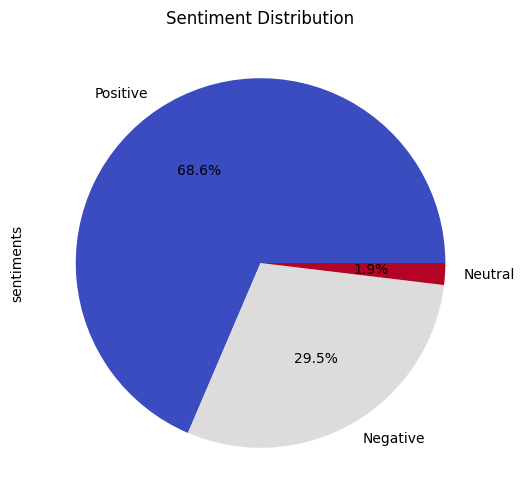

In [14]:
# Pie Chart
plt.figure(figsize=(6, 6))
df_exploded['sentiments'].value_counts().plot(kind='pie', autopct='%1.1f%%', colormap='coolwarm')
plt.title("Sentiment Distribution")
plt.show()

In [ ]:
### Now let's try to take these aspect terms and group them based on similarity
# Word embeddings 
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
model = SentenceTransformer('all-MiniLM-L6-v2')  # Small but effective embedding model
# Convert aspect terms to vectors
aspect_vectors = model.encode(df_exploded['aspect_terms'].dropna().tolist())
# Compute similarity matrix
similarity_matrix = cosine_similarity(aspect_vectors)